## Advanced Electromagnetism -  Plane wave on a circular aperture in a PEC ground screen simulation

### Yves HERI

#### Michigan State Univeristy

___

The far zone electric field produced by a plane wave impinging on a circular aperture in a PEC ground screen. The analysis in this notebook are based on this normalized magnitude of the electric field given by

\begin{equation}
        |{E}|_N \propto \left(\frac{a/\lambda}{\sqrt{\left(\frac{x}{\lambda}\right)^2+\left(\frac{y}{\lambda}\right)^2+\left(\frac{d}{\lambda}\right)^2}}\right)\Bigg|\frac{J_1\left[2\pi (a/\lambda)\sin\theta
    \right]}{\sin\theta}\Bigg|\sqrt{\cos^2 \phi+\cos^2\theta\sin^2\phi }
\end{equation}

where the expressions of  $\theta$ is 

\begin{equation}
    \theta = \frac{d/\lambda}{\sqrt{\left(\frac{x}{\lambda}\right)^2+\left(\frac{y}{\lambda}\right)^2+\left(\frac{d}{\lambda}\right)^2}}
\end{equation}

and $\phi$ are given 

\begin{equation}
    \phi=\text{sign}(y/\lambda)\frac{x/\lambda}{\sqrt{\left(\frac{x}{\lambda}\right)^2+\left(\frac{y}{\lambda}\right)^2}}
\end{equation}

___

#### Import Librairies 

In [1]:
import numpy as np                     # For mathematical function 
import matplotlib.pyplot as plt        # For plotting 
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.integrate import quad         # For Numerical integration 
from scipy.special import jv          # Bessel's Function
sns.set_context("paper",font_scale = 1.4)   # Plot style customization
from numpy.lib import meshgrid

#### Convert cartesian to spherical coordinates ####

In [2]:
def Cart_to_Spher(pt):

    x,y = meshgrid(pt[0],pt[1])
    z = pt[2]

    rho = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/rho)
    phi = np.sign(y)*np.arccos(x/(np.sqrt(x**2+y**2)))

    # if np.isnan(phi):
    #   phi = 0  

    return rho,theta,phi

#### Bessel's function's argument

In [3]:
arg_Bes = lambda a,theta: 2*np.pi*a*np.sin(theta) 

#### Trigonometric terms 

In [4]:
trigo = lambda theta,phi: np.sqrt(np.cos(phi)**2+(np.cos(theta)**2)*(np.sin(phi)**2))

### Results 

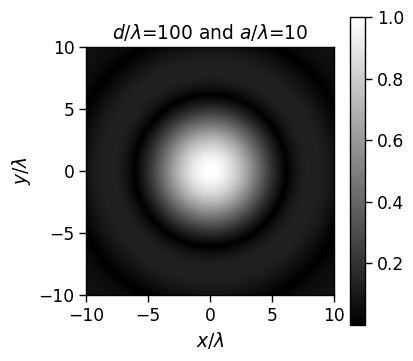

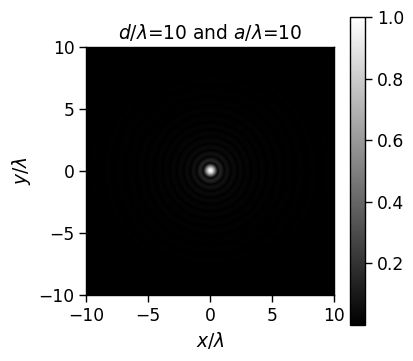

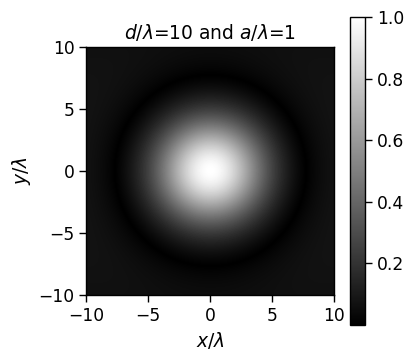

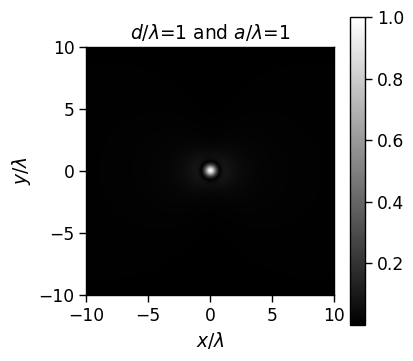

In [5]:

#### Cases ####

case_1 = [100,10]
case_2 = [10,10]
case_3 = [10,1]
case_4 = [1,1]

cases = (case_1,case_2,case_3,case_4)

##### Define grid range cartesian coordinates #####

x_lambda = np.linspace(-10,10,1000)
y_lambda = np.linspace(-10,10,1000)

#### Results Magnitude of E normalized ####

def E_magnitude(a,pts):
    rho,theta,phi = Cart_to_Spher(pts)
    argument_Bessel = arg_Bes(a,theta)
    trigo_term = trigo(theta,phi)

    return (a/rho)*trigo_term*abs(jv(1,argument_Bessel)/np.sin(theta))

for c in cases:
    z = c[0]
    a = c[1]

    points = [x_lambda,y_lambda,z]

    E_sol = E_magnitude(a,points)

    E_sol_norm = E_sol / np.max(E_sol)

    figure(figsize=(4, 4), dpi=100)
    plt.imshow(E_sol_norm,interpolation='gaussian', origin='lower',extent=[-10,10,-10,10],cmap='gray')
    plt.colorbar()
    plt.title(f'$d/\lambda$={z} and $a/\lambda$={a}')
    plt.xlabel('$x/\lambda$')
    plt.ylabel('$y/\lambda$')
    plt.show()

___